In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## unzip Dataset to /content dir ##

!unzip '/content/drive/My Drive/Avantari/dataset.zip'

Archive:  /content/drive/My Drive/Avantari/dataset.zip
   creating: dataset/
  inflating: dataset/3604.jpg        
  inflating: dataset/3487.jpg        
  inflating: dataset/2902.jpg        
  inflating: dataset/1484.jpg        
  inflating: dataset/1175.jpg        
  inflating: dataset/246.jpg         
  inflating: dataset/3618.jpg        
  inflating: dataset/3763.jpg        
  inflating: dataset/2436.jpg        
  inflating: dataset/3248.jpg        
  inflating: dataset/1662.jpg        
  inflating: dataset/4282.jpg        
  inflating: dataset/2351.jpg        
  inflating: dataset/4385.jpg        
  inflating: dataset/2380.jpg        
  inflating: dataset/4651.jpg        
  inflating: dataset/2830.jpg        
  inflating: dataset/1846.jpg        
  inflating: dataset/1807.jpg        
  inflating: dataset/1536.jpg        
  inflating: dataset/2977.jpg        
  inflating: dataset/120.jpg         
  inflating: dataset/1103.jpg        
  inflating: dataset/1985.jpg        
  inflating

In [ ]:
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

## Load model with denoising encoder-decoder (salt and pepper noise)
autoencoder = load_model('/content/drive/My Drive/Avantari/model_salt_and_pepper')

## Get encoder network from autoencoder (encoder-decoder)
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer("encoded").output)

## Load data map pickle to get extracted features with indexes (image index)
data_map = pickle.loads(open('/content/drive/My Drive/Avantari/data_map_salt_and_pepper.pickle', "rb").read())

In [ ]:


from sklearn.neighbors import NearestNeighbors
from google.colab.patches import cv2_imshow
import os
import cv2

def get_similar_images(queryImageFeatures, data_map, number_of_sim_img = 5):

  '''
  This function will find the given number of similar images, given features of query image.

  parameters :
    queryImageFeatures : 512 dimensional feature vector extracted from the encoder
    number_of_sim_img : number of similar images to find, default 5
     data_map : data map

  return :
    images : list of length number_of_sim_img, having length number_of_sim_img image names which are similar ro the query image

  ''' 

  nbrs = NearestNeighbors(n_neighbors=number_of_sim_img).fit(data_map['features'])

  _ , idx_in_data_map_features = nbrs.kneighbors([queryImageFeatures])

  idx_in_data_map_features = idx_in_data_map_features[0].tolist()

  # get image indexes using data_map['indexes']
  image_indexes = [data_map['indexes'][idx] for idx in idx_in_data_map_features]

  images = [str(image_index)+'.jpg' for image_index in image_indexes]

  return images

def show_retrieved_images(img_dir, images, size=None):

  '''
  Show similar images

  parameters:
    img_dir : directory in which the images are present
    images : names of similar images
    size : in which size the images should be should, default None

  '''

  for image in images:

    img_path = os.path.join(img_dir, image)
    print(img_path)

    img = cv2.imread(img_path)

    if size is not None:
      img = cv2.resize(img, (size, size))
    
    cv2_imshow(img)




In [ ]:
import os
import cv2
import numpy as np

from utils import get_preprocessed_images


In [ ]:
## Quering Image and retrieving simliar images using Nearest Neighbors algorithm
## (retrieving images using euclidean distance distance between features also gave the same results)

# Let's do it for an image, upload image

from google.colab import files
# Upload query image
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving img.jpg to img (1).jpg
User uploaded file "img.jpg" with length 79014 bytes


In [ ]:
number_of_sim_img = input('Enter number of similar images you want to retrieve')

Enter number of similar images you want to retrieve5


In [ ]:
query_image_name = [fn]

query_image = get_preprocessed_images('/content', query_image_name )

queryImageFeatures = encoder.predict(query_image)[0]

images = get_similar_images(queryImageFeatures, data_map, number_of_sim_img = int(number_of_sim_img))

print('Similar image names')
print(images)

/content/img.jpg
Similar image names
['2287.jpg', '1647.jpg', '1283.jpg', '2434.jpg', '3217.jpg']


/content/dataset/2287.jpg


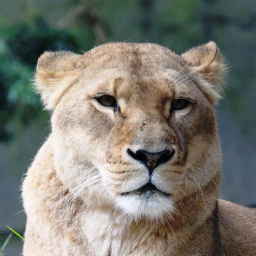

/content/dataset/1647.jpg


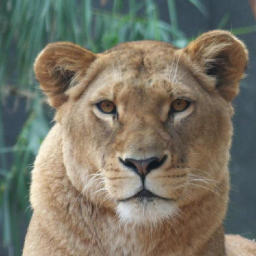

/content/dataset/1283.jpg


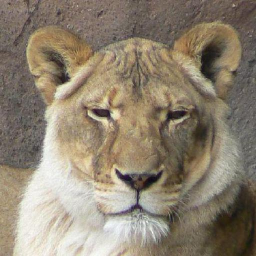

/content/dataset/2434.jpg


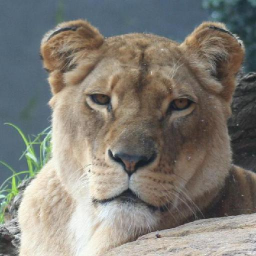

/content/dataset/3217.jpg


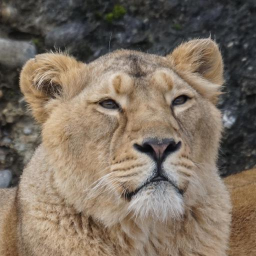

In [ ]:
# Show similar images
img_dir = '/content/dataset'
show_retrieved_images(img_dir, images, size=256)